In [49]:
cd ../src

/Users/laura/DSI/yelp/Yelp-Reviews/src


In [ ]:
import numpy as np
import pandas as pd
import datetime
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

In [54]:
run mapping.py

In [ ]:
base_map = folium.Map(location=[39.73782,-104.971338],
                      zoom_start=4,
                      tiles="Cartodbpositron",
                      prefer_canavs=True)

In [ ]:
vegas_map

In [ ]:
len(vegas_df[vegas_df['longitude'].isna()])

In [ ]:
vegas_map = folium.Map(location=[36.1699, -115.1398],
                        zoom_start=11,
                        tiles="Cartodbpositron",
                        prefer_canavs=True)

all_bus_map = folium.FeatureGroup(name = 'all_bus_map')
max_amount = float(20)
weights = np.repeat(0.9, len(vegas_df))
all_bus_map.add_child(HeatMap(list(zip(vegas_df['latitude'].values, vegas_df['longitude'].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=4, blur=1, 
                   max_zoom=1
                 ))
vegas_map.add_child(all_bus_map)

#folium.LayerControl().add_to(vegas_map)
vegas_map

In [ ]:
FastMarkerCluster(data=list(zip(vegas_df['latitude'].values, vegas_df['longitude'].values)),
                  name='marker clusters'
                 ).add_to(vegas_map)
#folium.LayerControl().add_to(vegas_map)
vegas_map

In [ ]:
vegas_map.save('../images/vegas_folium_heat.html')

In [ ]:
bitcoin_map = folium.FeatureGroup(name = 'bitcoin map')
bitcoin_df = vegas_df[vegas_df['BusinessAcceptsBitcoin']=="True"]

for idx, row in bitcoin_df.iterrows():
        folium.CircleMarker(location=(row['latitude'], row['longitude']),
                            radius=.75,
                            color="red",
                            popup=str(row['name'] + '/n' +
                                      'Rating: ' + str(row['stars']) \
                                        + '\n# Reviews: ' + str(row['review_count'])
                                      ),
                            fill=True).add_to(bitcoin_map)
        
vegas_map.add_child(bitcoin_map)

In [ ]:
restaurant_map = folium.FeatureGroup(name = 'restaurant map')
restaurant_df = vegas_df[vegas_df['Restaurant']==True]

for idx, row in restaurant_df.iterrows():
        folium.Circle(location=(row['latitude'], row['longitude']),
                            radius=1000,
                            color="blue",
                            popup=str('Rating: ' + str(row['stars']) \
                                        + '\n# Reviews: ' + str(row['review_count'])
                                      ),
                            fill=True).add_to(restaurant_map)
        
vegas_map.add_child(restaurant_map)

In [ ]:
vegas_map = folium.Map(location=[36.1699, -115.1398],
                        zoom_start=11,
                        tiles="Cartodbpositron",
                        prefer_canavs=True)
vegas_map

In [ ]:
default_max_val = 30

create_heatmap_layer(vegas_df, vegas_map, 'all businesses')

five_stars_df = vegas_df[vegas_df['stars']==5.0]
max_val = (len(five_stars_df) / len(vegas_df)) * default_max_val * 2
create_heatmap_layer(five_stars_df, vegas_map, '5-star businesses', max_val=max_val)

folium.LayerControl().add_to(vegas_map)
vegas_map

In [ ]:
weight = len(vegas_df)/len(five_stars_df)
n = len(five_stars_df)
weight

In [ ]:
a = [1,2]
b = [3,4]
c = [5, 5]
lst = list(zip(a, b, c))

In [ ]:
max(charlotte_df['longitude'])

In [ ]:
create_dots_layer(charlotte_df, charlotte_map, 'all businesses', 'red')
charlotte_map

In [110]:
charlotte_map

In [42]:
cd src

/Users/laura/DSI/yelp/Yelp-Reviews/src


In [105]:
category_counts = pd.read_pickle('../data/pickled_category_counts')
category_counts[0:5]

,elem,count
0,Restaurants,9832
1,Food,3352
2,Nightlife,2821
3,Bars,2635
4,American (Traditional),1760


In [102]:
top_5_cats = list(category_counts['elem'][0:5])
top_5_cats
top_4_cats = list(category_counts['elem'][0:4])
top_4_cats

['Restaurants', 'Food', 'Nightlife', 'Bars']

In [103]:
for idx, cat in enumerate(top_4_cats):
    tp = type(cat)
    print(f'{idx} and {cat} and {tp}')

0 and Restaurants and <class 'str'>
1 and Food and <class 'str'>
2 and Nightlife and <class 'str'>
3 and Bars and <class 'str'>


In [109]:
run mapping.py

In [104]:
for layer in top_4_cats:
    my_df = vegas_df[vegas_df['categories'].str.contains(layer)]
    n = len(my_df)
    print(f'df with {layer} is {n}')

df with Restaurants is 2360
df with Food is 1029
df with Nightlife is 707
df with Bars is 883


In [75]:
a = 'Chinese'
chinese_df = vegas_df[vegas_df['categories'].str.contains(a)]
chinese_df.head()

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state,Restaurant
55,7537 S Rainbow Blvd,None,None,'beer_and_wine',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,True,None,...,11:0-23:0,1,36.051450,-115.244115,Rainbow Kitchen,89139,101,4.0,NV,True
149,"4215 Spring Mountain Rd, Ste B101",None,None,u'none',"{'romantic': False, 'intimate': False, 'touris...",False,'yes_free',None,False,None,...,11:0-23:0,1,36.125381,-115.195980,Sam Woo BBQ Restaurant,89102,550,2.0,NV,True
171,3355 Las Vegas Blvd S,None,None,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",None,'no',None,False,None,...,11:0-3:0,1,36.122689,-115.170163,Noodle Asia,89109,1090,3.5,NV,True
201,"3700 E Desert Inn Rd, Ste 1",None,None,'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",None,'no',None,True,None,...,11:0-21:30,1,36.129929,-115.093628,Wo Fat,89121,165,3.5,NV,True
219,"2980 S Durango Dr, Ste 101",None,None,u'none',"{'romantic': False, 'intimate': False, 'touris...",None,None,None,True,None,...,11:0-21:30,1,36.134983,-115.278434,Pan Asian,89117,669,4.5,NV,True


In [94]:
my_df

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state,Restaurant


In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

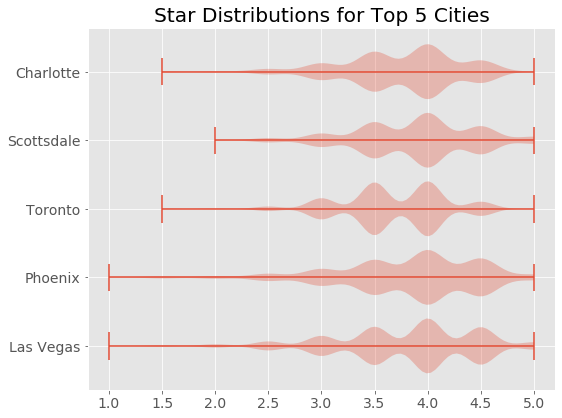

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
top_5_cities = businesses_df['city'].value_counts()[0:5].index
labels = top_5_cities

city_stars = [np.array(businesses_df[businesses_df['city']==city]['stars']) for city in top_5_cities]


ax.violinplot(city_stars, vert=False, widths=0.8)
ax.set_yticks(np.arange(1, len(labels) + 1))
ax.set_yticklabels(labels)
ax.set_title('Star Distributions for Top 5 Cities')
fig.tight_layout(pad=1)
#fig.savefig('../images/Star Distributions for Top 5 Cities violin.png')

In [148]:
top_5_cities

Index(['Las Vegas', 'Phoenix', 'Toronto', 'Scottsdale', 'Charlotte'], dtype='object')

In [127]:
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
type(data[0])

numpy.ndarray

In [164]:
def plot_barh(x, y, title='', x_label='', y_label='', legend_label='', save=False):
    fig, ax = plt.subplots()
    ax.barh(x, y)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    plt.gca().invert_yaxis()
    plt.tight_layout(pad=2)
    if save:
        fig.savefig(f'../images/{title}.png')

No handles with labels found to put in legend.


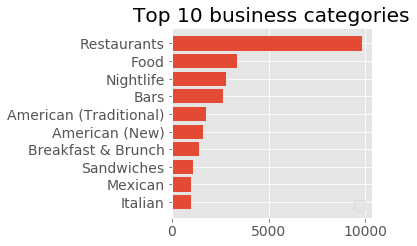

In [167]:
x = category_counts['elem'][0:10]
y = category_counts['count'][0:10]
title = 'Top 10 business categories'
plot_barh(x, y, title=title, save=True)

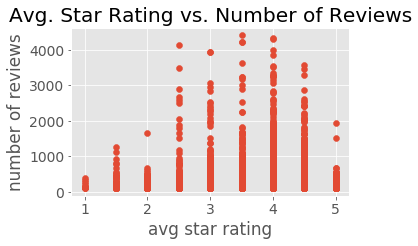

In [169]:
    fig, ax = plt.subplots()
    data = businesses_df[businesses_df['review_count']<5000]
    x = data['stars']
    y = data['review_count']
    ax.scatter(x, y)
    ax.set_xlabel('avg star rating')
    ax.set_ylabel('number of reviews')
    title = 'Avg. Star Rating vs. Number of Reviews'
    ax.set_title(title)
    plt.tight_layout(pad=2)
    fig.savefig(f'../images/{title}.png')

No handles with labels found to put in legend.


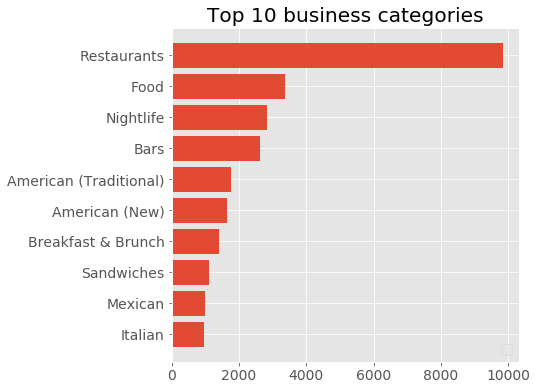

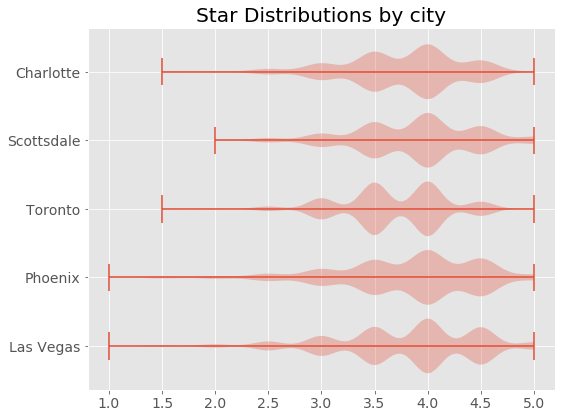

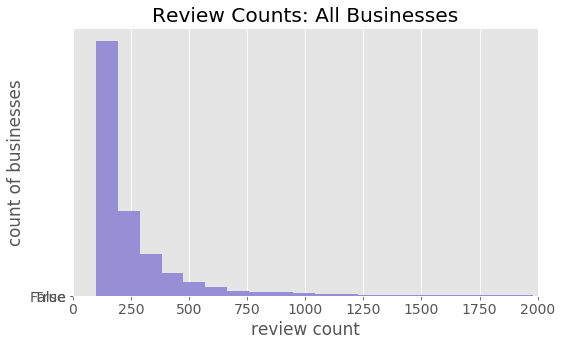

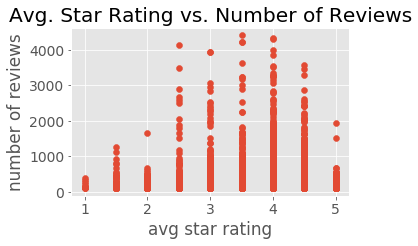

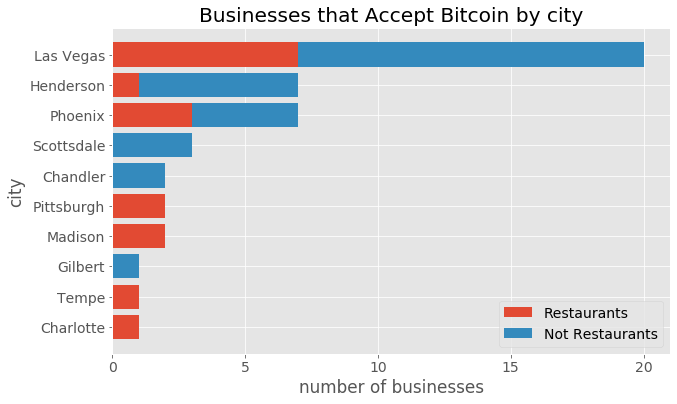

In [175]:
run yelp_plots.py

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
from importlib import reload
import business_df as ydf
reload(business_df)
from business_df import *

NameError: name 'business_df' is not defined